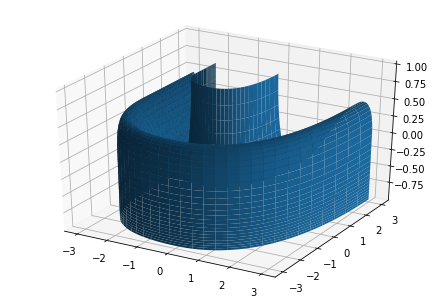

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p1 = 2 #order of the polynomial for first basis function
p2 = 2 #order of the polynomial for second basis function

n1 = 4 #number of basis vector for first basis function
n2 = 4 #number of basis vector for second basis function

knot_vect1 = np.array([0, 0, 0, 1/3, 2/3, 1, 1, 1])
knot_vect2 = np.array([0, 0, 0, 1/3, 2/3, 1, 1, 1])

ctrlpts = np.array([[[1,1,1],[1,-1,1], [-1,-1,1],[-1,1,1]],[[1,1,-1],[1,-1,-1], [-1,-1,-1],[-1,1,-1]],[[3,3,1],[3,-3,1], [-3,-3,1],[-3,3,1]],
                   [[3,3,-1],[3,-3,-1], [-3,-3,-1],[-3,3,-1]]])

w = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
 
def coxDeBoor(zeta, i, d, knot_vect):
    
    if d==0:
        if knot_vect[i] <= zeta and zeta < knot_vect[i+1]:
            return 1
        return 0
    
    D1 = knot_vect[i+d] - knot_vect[i]
    D2 = knot_vect[i+d+1] - knot_vect[i+1]
    
    E1 = 0
    E2 = 0
    
    if D1 > 0:
        E1 = (zeta - knot_vect[i])/D1 * coxDeBoor(zeta, i, d-1, knot_vect)
    
    if D2 > 0:
        E2 = (knot_vect[i+d+1] - zeta)/D2 * coxDeBoor(zeta, i+1, d-1, knot_vect)
        
    return E1+E2

x = np.linspace(0,1,100)
n = np.linspace(0,1,100)
xi, neta = np.meshgrid(x,n)
Xi = np.array(xi, dtype = np.float)
Neta = np.array(neta, dtype = np.float)

def Surface(xi, neta):
    N1 = np.zeros((n1))
    N2 = np.zeros((n2))
    S = 0
    N_wtd = np.zeros((n1, n2)) 
    
    for i in range(n1):
        N1[i] = coxDeBoor(xi, i, p1, knot_vect1)

    for i in range(n2):
        N2[i] = coxDeBoor(neta, i, p2, knot_vect2)

    for i in range(n1):
        for j in range(n2):
            N_wtd[i,j] = N1[i]*N2[j]*w[i,j]

    Wtd_sum = np.sum(N_wtd)
    for i in range(n1):
        for j in range(n2):
            if Wtd_sum != 0:
                S = S + N_wtd[i,j]/Wtd_sum * ctrlpts[i,j]

    return S


Surf = np.zeros((len(n),len(x),3))

for i in range(len(n)):
    for j in range(len(x)):
        Surf[i,j] = Surface(Xi[i,j], Neta[i,j])


fig = plt.figure()

ax = Axes3D(fig)

ax.plot_surface(Surf[0:-1,0:-1,0], Surf[0:-1,0:-1,1], Surf[0:-1,0:-1,2])

plt.show()



In [2]:
Surf[:,:,0]

array([[ 1.        ,  1.00040812,  1.00163249, ...,  2.99836751,
         2.99959188,  0.        ],
       [ 0.99959188,  0.99999983,  1.0012237 , ...,  2.99714381,
         2.99836768,  0.        ],
       [ 0.99836751,  0.99877497,  0.99999733, ...,  2.99347272,
         2.99469509,  0.        ],
       ...,
       [-0.99836751, -0.99877497, -0.99999733, ..., -2.99347272,
        -2.99469509,  0.        ],
       [-0.99959188, -0.99999983, -1.0012237 , ..., -2.99714381,
        -2.99836768,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
np.shape(Surf[:,:,0])

(100, 100)